In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import unicodedata
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Load the data file into a DataFrame.
df= pd.read_csv(r'C:\Users\nickm\Documents\senators.csv')

In [3]:
df.head()

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/2017 21:47,We released bipartisan healthcare bill today a...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/2017 18:48,I spoke with MorningJoe team abt HonestAds bil...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/2017 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/2017 18:04,Todays the day MarkWarner SenJohnMcCain amp I ...,https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/2017 16:33,MarkWarner SenJohnMcCain amp I put together Ho...,https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN


In [5]:
#Creating a data frame with only the required fields for our model
testdata = df[['party', 'text']]

In [6]:
testdata.head()

,party,text
0,D,We released bipartisan healthcare bill today a...
1,D,I spoke with MorningJoe team abt HonestAds bil...
2,D,Lots of interest in my bill with Senators Warn...
3,D,Todays the day MarkWarner SenJohnMcCain amp I ...
4,D,MarkWarner SenJohnMcCain amp I put together Ho...


In [7]:
testdata.shape

(288615, 2)

In [8]:
#converting text to on lowercase letters
testdata['text'] = testdata['text'].str.lower()

<ipython-input-8-50483ba77f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['text'] = testdata['text'].str.lower()


In [9]:
testdata.head()

,party,text
0,D,we released bipartisan healthcare bill today a...
1,D,i spoke with morningjoe team abt honestads bil...
2,D,lots of interest in my bill with senators warn...
3,D,todays the day markwarner senjohnmccain amp i ...
4,D,markwarner senjohnmccain amp i put together ho...


In [12]:
#importing stopwords list
from nltk.corpus import stopwords

In [13]:
#importing tokenization libs
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import nltk

In [15]:
#Converting text to string
testdata['text'] = testdata.text.apply(str)

<ipython-input-15-f5099cbe25c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['text'] = testdata.text.apply(str)


In [17]:
#creating a sample data set from larger testdata
sampledata = testdata.sample(frac=0.30)

In [59]:
sampledata.party.value_counts()

R    43778
D    40900
I     1906
Name: party, dtype: int64

In [19]:
twitter_sample = sampledata[(sampledata['party'] !=  'I')]

In [21]:
twitter_sample.party.value_counts()

R    43778
D    40900
Name: party, dtype: int64

In [22]:
twitter_sample['text'] = twitter_sample.text.apply(str)

<ipython-input-22-185a36b0c7b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample['text'] = twitter_sample.text.apply(str)


In [23]:
#tokenizing sample data
twitter_sample['text'] = [word_tokenize(word) for word in twitter_sample['text']]

<ipython-input-23-09085767bbb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample['text'] = [word_tokenize(word) for word in twitter_sample['text']]


In [24]:
twitter_sample.head()

,party,text
270964,R,"[thanks, to, arkansas, members, of, the, alzhe..."
255259,D,"[rt, ceccgov, statement, by, senator, sherrod,..."
32428,R,"[rt, cnn, sens, john, mccain, and, lindsey, gr..."
154615,D,"[flynns, resignation, trump, aides, and, their..."
257903,D,"[chairwoman, stabenow, announces, bipartisan, ..."


In [25]:
stop_words=stopwords.words('english')

In [27]:
#function to remove stopwords
def remove_stopwords(sent):
    return [word for word in sent if word not in stop_words]

In [28]:
#applying remove_stopwords function
twitter_sample['text'] = twitter_sample.text.apply(remove_stopwords)

<ipython-input-28-1a04740005de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample['text'] = twitter_sample.text.apply(remove_stopwords)


In [31]:
twitter_sample.head()

,party,text
270964,R,thanks arkansas members alzheimers association...
255259,D,rt ceccgov statement senator sherrod brown cha...
32428,R,rt cnn sens john mccain lindsey graham join da...
154615,D,flynns resignation trump aides communication r...
257903,D,chairwoman stabenow announces bipartisan agree...


In [30]:
#Untokenizing sample text
twitter_sample['text'] = twitter_sample['text'].apply(lambda text: ' '.join(text))

<ipython-input-30-3c9dadff9292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample['text'] = twitter_sample['text'].apply(lambda text: ' '.join(text))


In [32]:
twitter_sample.head()

,party,text
270964,R,thanks arkansas members alzheimers association...
255259,D,rt ceccgov statement senator sherrod brown cha...
32428,R,rt cnn sens john mccain lindsey graham join da...
154615,D,flynns resignation trump aides communication r...
257903,D,chairwoman stabenow announces bipartisan agree...


In [33]:
#declaring tfidf vectorizer
tfidf = TfidfVectorizer(max_features=4000)

In [34]:
#Applying tfidf to sample
feature_matrix = tfidf.fit_transform(twitter_sample.text)

In [35]:
tfidf.vocabulary_

{'thanks': 3546,
 'arkansas': 298,
 'members': 2179,
 'alzheimers': 229,
 'association': 322,
 'meeting': 2174,
 'today': 3598,
 'rt': 3014,
 'statement': 3378,
 'senator': 3135,
 'sherrod': 3257,
 'brown': 492,
 'chair': 582,
 'commission': 719,
 'china': 621,
 'cont': 791,
 'cnn': 677,
 'sens': 3206,
 'john': 1895,
 'mccain': 2151,
 'lindsey': 2037,
 'graham': 1517,
 'join': 1900,
 'live': 2047,
 'watch': 3856,
 'tonight': 3607,
 'pm': 2604,
 'et': 1203,
 'resignation': 2938,
 'trump': 3673,
 'russian': 3024,
 'officials': 2422,
 'open': 2447,
 'air': 196,
 'regarding': 2858,
 'north': 2379,
 'korean': 1953,
 'stabenow': 3357,
 'announces': 258,
 'bipartisan': 434,
 'agreement': 187,
 'final': 1336,
 'farm': 1299,
 'bill': 428,
 'ohio': 2427,
 'housing': 1684,
 'amp': 247,
 'employment': 1143,
 'lgbt': 2020,
 'discrimination': 1033,
 'still': 3394,
 'legal': 2006,
 'true': 3671,
 'worth': 3959,
 '11': 7,
 'million': 2210,
 'pay': 2546,
 'tax': 3491,
 'supreme': 3454,
 'court': 842,
 

In [36]:
#declaring feature model
data_model_X = feature_matrix

In [37]:
data_model_X.shape

(84678, 4000)

In [38]:
#Labels
data_model_Y = twitter_sample.party

In [39]:
data_model_Y.shape

(84678,)

In [40]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_Y, test_size =0.3, random_state=12)

In [41]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  59274
No. of samples in validation set: 25404


In [43]:
# Survived and not-survived
print('\n')
print('No. of Rep and Dem in the training set:')
print(y_train.value_counts())

print('\n')
print('No. Rep and Dem in the validation set:')
print(y_val.value_counts())



No. of Rep and Dem in the training set:
R    30665
D    28609
Name: party, dtype: int64


No. Rep and Dem in the validation set:
R    13113
D    12291
Name: party, dtype: int64


In [44]:
from sklearn.neural_network import MLPClassifier

I am using the Multi-layer Perceptron model to classify the twitter text to either Republican or Democratic.
in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [45]:
#declaring MLP classifier model
mlp = MLPClassifier(hidden_layer_sizes=[500,150], verbose=True)

In [46]:
#training model
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.47118220
Iteration 2, loss = 0.35740480
Iteration 3, loss = 0.21536051
Iteration 4, loss = 0.05813556
Iteration 5, loss = 0.02017561
Iteration 6, loss = 0.01320786
Iteration 7, loss = 0.01137832
Iteration 8, loss = 0.01100333
Iteration 9, loss = 0.01007159
Iteration 10, loss = 0.00965846
Iteration 11, loss = 0.00965135
Iteration 12, loss = 0.00860583
Iteration 13, loss = 0.00800240
Iteration 14, loss = 0.00750652
Iteration 15, loss = 0.00716681
Iteration 16, loss = 0.00673527
Iteration 17, loss = 0.00654652
Iteration 18, loss = 0.00640232
Iteration 19, loss = 0.00627799
Iteration 20, loss = 0.00629126
Iteration 21, loss = 0.00612400
Iteration 22, loss = 0.00596390
Iteration 23, loss = 0.00585965
Iteration 24, loss = 0.00584515
Iteration 25, loss = 0.00629482
Iteration 26, loss = 0.02177272
Iteration 27, loss = 0.01658362
Iteration 28, loss = 0.00857849
Iteration 29, loss = 0.00675234
Iteration 30, loss = 0.00630419
Iteration 31, loss = 0.00606137
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[500, 150], verbose=True)

In [47]:
#Model validation 
predictions = mlp.predict(X_val)

In [48]:
#confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,predictions))

[[ 9632  2659]
 [ 2555 10558]]


The results of the MLP model look pretty good. Around 80% accuracy for prediction of Republican and Democratic Twitter text. 

In [49]:
#Model accuracy stats
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           D       0.79      0.78      0.79     12291
           R       0.80      0.81      0.80     13113

    accuracy                           0.79     25404
   macro avg       0.79      0.79      0.79     25404
weighted avg       0.79      0.79      0.79     25404



# Logistic Regression Model

The results of my first model were pretty good, but I want to attempt to improve them. I will attempt to build a Logistic Regression Model and evaluate the differences in accuracy. I would also like to see if enlarging the sample size will increase accuracy.

In [57]:
#Increasing the sample size from 30% in previous model to 50%
sampledata2= testdata.sample(frac=0.50)

In [58]:
sampledata2.head()

,party,text
248334,D,she attends hunter college and hopes to become...
281773,D,to the climatechange science denier groups who...
9047,D,we should be focused on using the best science...
192746,D,devos approach to education has failed the chi...
21340,R,biden our time clearly isnt solving the debt p...


In [60]:
sampledata2.party.value_counts()

R    73155
D    68027
I     3126
Name: party, dtype: int64

In [61]:
#Removing Independent party data
twitter_sample2 = sampledata2[(sampledata2['party'] !=  'I')]

In [62]:
twitter_sample2.party.value_counts()

R    73155
D    68027
Name: party, dtype: int64

In [63]:
twitter_sample2['text'] = twitter_sample2.text.apply(str)

<ipython-input-63-c3e01da09d06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample2['text'] = twitter_sample2.text.apply(str)


In [64]:
#tokenizing sample data
twitter_sample2['text'] = [word_tokenize(word) for word in twitter_sample2['text']]

<ipython-input-64-b131033f9945>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample2['text'] = [word_tokenize(word) for word in twitter_sample2['text']]


In [66]:
#applying remove_stopwords function
twitter_sample2['text'] = twitter_sample2.text.apply(remove_stopwords)

<ipython-input-66-303542e99d06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample2['text'] = twitter_sample2.text.apply(remove_stopwords)


In [67]:
#Untokenizing sample text
twitter_sample2['text'] = twitter_sample2['text'].apply(lambda text: ' '.join(text))

<ipython-input-67-560e75033c9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_sample2['text'] = twitter_sample2['text'].apply(lambda text: ' '.join(text))


In [68]:
twitter_sample2.head()

,party,text
248334,D,attends hunter college hopes become social wor...
281773,D,climatechange science denier groups responded ...
9047,D,focused using best science available actonclim...
192746,D,devos approach education failed children mi gi...
21340,R,biden time clearly isnt solving debt problem h...


In [69]:
#declaring tfidf vectorizer
#increasing the feature size to 5000 from 4000 used in the previous model
tfidf2 = TfidfVectorizer(max_features=5000)

In [70]:
#Applying tfidf to sample
feature_matrix2 = tfidf2.fit_transform(twitter_sample2.text)

In [71]:
tfidf2.vocabulary_

{'college': 881,
 'hopes': 2123,
 'become': 506,
 'social': 4147,
 'worker': 4931,
 'goes': 1890,
 'core': 1020,
 'defenddaca': 1183,
 'climatechange': 845,
 'science': 3877,
 'groups': 1957,
 'webofdenial': 4837,
 'letter': 2550,
 'proves': 3452,
 'point': 3286,
 'focused': 1753,
 'using': 4710,
 'best': 526,
 'available': 436,
 'speaking': 4178,
 'senwhitehouse': 4039,
 'senatedems': 3936,
 'devos': 1258,
 'approach': 364,
 'education': 1395,
 'failed': 1613,
 'children': 785,
 'mi': 2764,
 'gives': 1878,
 'reason': 3544,
 'think': 4446,
 'successful': 4311,
 'nation': 2905,
 'biden': 533,
 'time': 4485,
 'clearly': 840,
 'isnt': 2360,
 'debt': 1164,
 'problem': 3399,
 'obamacares': 3031,
 'brokenpromises': 622,
 'watch': 4819,
 'senate': 3931,
 'floor': 1743,
 'live': 2592,
 'hear': 2033,
 'debate': 1163,
 'im': 2213,
 'fighting': 1682,
 'strong': 4287,
 'funding': 1831,
 'nasa': 2902,
 'earth': 1374,
 'research': 3691,
 'help': 2050,
 'us': 4689,
 'better': 531,
 'understand': 4647

In [72]:
#declaring feature model
data_model_X2 = feature_matrix2

In [77]:
#Labels
data_model_Y2 = twitter_sample2.party

In [78]:
from sklearn.model_selection import train_test_split

# split the data
X_train2, X_val2, y_train2, y_val2 = train_test_split(data_model_X2, data_model_Y2, test_size =0.3, random_state=15)

In [79]:
# number of samples in each set
print("No. of samples in training set: ", X_train2.shape[0])
print("No. of samples in validation set:", X_val2.shape[0])

No. of samples in training set:  98827
No. of samples in validation set: 42355


In [80]:
# Dems and Rep
print('\n')
print('No. of Rep and Dem in the training set:')
print(y_train2.value_counts())

print('\n')
print('No. Rep and Dem in the validation set:')
print(y_val2.value_counts())



No. of Rep and Dem in the training set:
R    51326
D    47501
Name: party, dtype: int64


No. Rep and Dem in the validation set:
R    21829
D    20526
Name: party, dtype: int64


In [81]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [82]:
model = LogisticRegression()

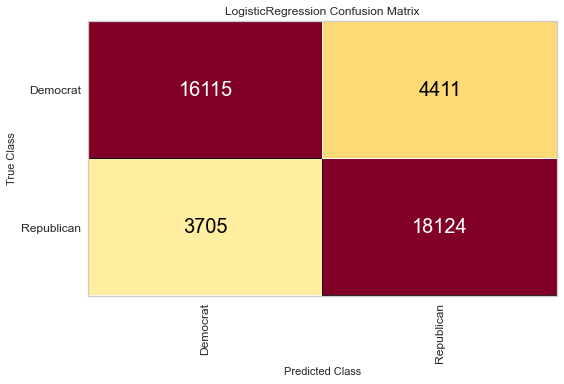

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [83]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Democrat','Republican']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(X_train2, y_train2)
cm.score(X_val2, y_val2)
for label in cm.ax.texts:
    label.set_size(20)
cm.poof()

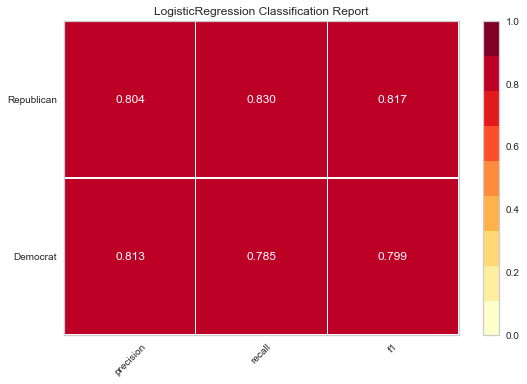

In [85]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_val2, y_val2)  # Evaluate the model on the test data
g = visualizer.poof()

# Summary

Increasing the sample size by 20% and changing the model type from Multi-layer Perceptron to Logistic Regression only increased model accuracy by about 2%. I also increased the feature size by 1000. I could remove the filter to create a "sample" and use the entire data set, but I am not sure if that will truly increase precision/ accuracy. 